In [12]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [13]:
#read in data from different notebook
import csv
data=[]
with open('/Users/oliviachandrasekhar/Desktop/betti_tlsclip_45_5_clean.csv', newline='') as file:
    reader = csv.reader(file, delimiter=',', quotechar='|')
    for row in reader:
        data.append(row)

In [14]:
#get b_0,b_1,b2 from each entry above
betti01=[]
betti02=[]
betti_0=[]
betti_1=[]
betti_2=[]
for item in data:
    b0=item[2]
    b1=item[3]
    b2=item[4]
    point1=item[2:4]
    point2=[item[2],item[4]]
    betti01.append(point1)
    betti02.append(point2)
    betti_0.append(b0)
    betti_1.append(b1)
    betti_2.append(b2)
n=len(data)
betti01=betti01[1:n]   #betti 0 and betti 1 in the same list--for analyzing betti 0 vs. betti 1
betti02=betti02[1:n]  
betti_0=betti_0[1:n]  
betti_1=betti_1[1:n]  
betti_2=betti_2[1:n]  

In [15]:
print(betti01)

[['48', '52'], ['88', '183'], ['86', '206'], ['101', '206'], ['82', '173'], ['48', '52'], ['88', '183'], ['86', '206'], ['101', '206'], ['82', '173'], ['80', '208'], ['114', '157'], ['110', '215'], ['117', '294'], ['89', '230'], ['63', '98'], ['84', '137'], ['97', '124'], ['101', '217'], ['85', '168'], ['82', '140'], ['83', '150'], ['64', '122'], ['50', '39'], ['43', '87'], ['67', '119'], ['73', '157'], ['118', '158'], ['94', '258'], ['116', '227'], ['94', '186'], ['88', '126'], ['85', '132'], ['83', '230'], ['97', '128'], ['118', '227'], ['113', '284'], ['95', '291'], ['109', '192'], ['116', '183'], ['75', '242'], ['79', '205'], ['98', '205'], ['115', '153']]


[[ 80.27272727 130.27272727]
 [ 94.5        216.42857143]
 [104.75       281.75      ]
 [ 47.25        57.5       ]
 [ 99.18181818 173.54545455]]


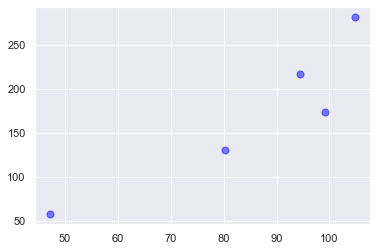

In [5]:
#k means b0 vs b1
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=5).fit(betti01) #specify number of clusters
y_kmeans1 = kmeans1.predict(betti01) #predict/create clusters
#centers for b0 vs b1
centers = kmeans1.cluster_centers_ #get centers of clusters 
print(centers)
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=50, alpha=0.5);

[[113.36363636  25.54545455]
 [ 66.75        13.        ]
 [ 90.23076923  10.30769231]
 [ 85.75        26.5       ]
 [ 47.25         3.25      ]]


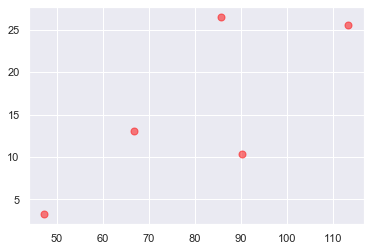

In [6]:
#k means b0 vs b2
from sklearn.cluster import KMeans
kmeans2 = KMeans(n_clusters=5).fit(betti02)
y_kmeans2 = kmeans2.predict(betti02)
#centers for b0 vs b2
centers = kmeans2.cluster_centers_
print(centers)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.5);

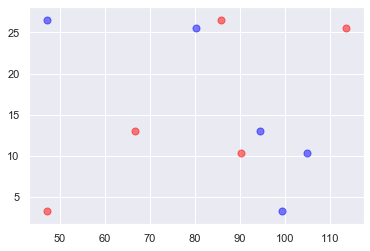

In [8]:
#centers for b0 vs b1
centers1 = kmeans1.cluster_centers_
#centers for b0 vs b2
centers2 = kmeans2.cluster_centers_
plt.scatter(centers1[:, 0], centers[:, 1], c='blue', s=50, alpha=0.5);
plt.scatter(centers2[:, 0], centers[:, 1], c='red', s=50, alpha=0.5);

#axes aren't scaled correctly, fix below

In [9]:
centers1x=[]
centers1y=[]
for item in centers1:
    centers1x.append(item[0])
    centers1y.append(item[1])

In [10]:
centers2x=[]
centers2y=[]
for item in centers2:
    centers2x.append(item[0])
    centers2y.append(item[1])

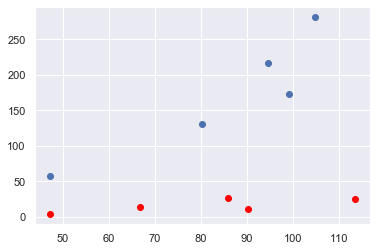

In [11]:
fig, ax = plt.subplots()
ax.plot(centers1x,centers1y,'o')
ax.plot(centers2x,centers2y,'o', color='red')
plt.show()

In [ ]:
#that's better!